<a href="https://colab.research.google.com/github/nafiulaziz/heart_fail/blob/main/heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.files import upload
file = upload()

Saving Heart_failure_clinical_records_dataset.csv to Heart_failure_clinical_records_dataset.csv


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('Heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<ipython-input-11-0a5134ffde59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["DEATH_EVENT"], palette=cols)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

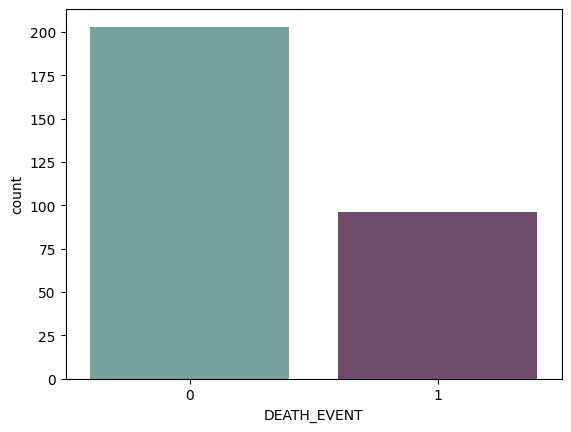

In [ ]:
cols = ["#6daa9f", "#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette=cols)

In [ ]:
X = data.drop(["DEATH_EVENT"], axis=1)
Y = data["DEATH_EVENT"]
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [ ]:
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,3.921055e-16,1.001676,-1.753828,-0.827980,-0.070469,0.771211,2.875411
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y, test_size=0.25, random_state=7)
#

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=30,
    restore_best_weights=True,
)
model = Sequential()
model.add(Dense(16, kernel_initializer= 'uniform', input_dim=12, activation='relu'))
model.add(Dense(8, kernel_initializer= 'uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, kernel_initializer= 'uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer= 'uniform', activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5881 - loss: 0.6929 - val_accuracy: 0.6667 - val_loss: 0.6922
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6999 - loss: 0.6919 - val_accuracy: 0.6667 - val_loss: 0.6914
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6574 - loss: 0.6913 - val_accuracy: 0.6667 - val_loss: 0.6906
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6544 - loss: 0.6906 - val_accuracy: 0.6667 - val_loss: 0.6898
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6426 - loss: 0.6901 - val_accuracy: 0.6667 - val_loss: 0.6890
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6590 - loss: 0.6890 - val_accuracy: 0.6667 - val_loss: 0.6881
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6323 - loss: 0.6890 - val_accuracy: 0.6667 - val_loss: 0.6873
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6819 - loss: 0.6866 - val_accuracy: 0.6667 - val_loss: 0.6

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("Validation Accuracy: ", val_accuracy*100)

Validation Accuracy:  66.66666865348816


In [ ]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)
Y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

[[57  0]
 [18  0]]


<Axes: >

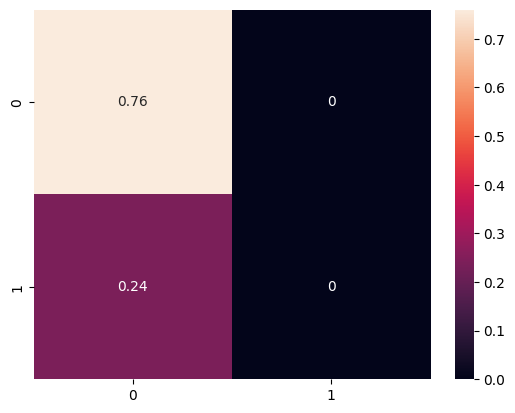

In [ ]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True)